In [5]:
import os
import pickle
import numpy as np
import pandas as pd
import scanpy
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import rc_context
import seaborn as sns
from pyscenic.rss import regulon_specificity_scores
from pyscenic.plotting import plot_binarization, plot_rss
from adjustText import adjust_text
import random

In [8]:
mpl.rcParams['figure.dpi'] = 300

scenic_out_dir = '/Volumes/TOSHIBA/TIMElab/GSE182109_processed/SCENIC/output/'

annotations_path = os.path.join(scenic_out_dir, 'new_cell_anno.tsv')
regulons_path = os.path.join(scenic_out_dir, 'regulons.pickle')
auc_mtx_path = os.path.join(scenic_out_dir, 'auc_mtx.pickle')

In [19]:
annotations = pd.read_csv(annotations_path, index_col=0,  sep='\t')

with open(regulons_path, 'rb') as f:
  regulons = pickle.load(f)

with open(auc_mtx_path, 'rb') as f:
  auc_mtx = pickle.load(f)

In [20]:
annotations = annotations.loc[auc_mtx.index.values]["cell.type.fine"]

Cell
AAACCTGAGAATGTTG-1_13       MES2
AAACCTGAGCTAGTTC-1_13    Prolif.
AAACCTGAGGACCACA-1_13       MDSC
AAACCTGAGGCACATG-1_13       MDSC
AAACCTGAGTTCGATC-1_13       MES1
                          ...   
TTTGTTGGTCCCTCAT-1_44         PC
TTTGTTGGTGAGATCG-1_44      h-Mic
TTTGTTGTCCACACCT-1_44       MES2
TTTGTTGTCCTGTAGA-1_44       iMic
TTTGTTGTCTCGACGG-1_44       iMic
Name: cell.type.fine, Length: 58419, dtype: object

In [46]:
cellsoi = annotations[pd.notnull(annotations)].index.values
annotations = annotations[cellsoi]

In [43]:
cell_type_rss = regulon_specificity_scores(auc_mtx.loc[cellsoi], annotations)
cell_type_rss

,ARID3A(+),ARNTL(+),ATF1(+),ATF3(+),ATF4(+),ATF5(+),ATF6(+),ATF6B(+),BACH1(+),BCL6(+),...,ZNF407(+),ZNF436(+),ZNF439(+),ZNF451(+),ZNF506(+),ZNF577(+),ZNF580(+),ZNF704(+),ZNF770(+),ZNF83(+)
MES2,0.296206,0.213544,0.249040,0.218963,0.231414,0.227563,0.214734,0.222490,0.224721,0.229175,...,0.225523,0.228139,0.210697,0.192456,0.237980,0.181300,0.229059,0.242140,0.261124,0.236256
Prolif.,0.181767,0.179581,0.182105,0.186373,0.184309,0.188642,0.185937,0.171708,0.184687,0.178954,...,0.179191,0.177408,0.169884,0.170008,0.172196,0.174297,0.183339,0.175290,0.178981,0.176404
MDSC,0.212112,0.183330,0.219081,0.218352,0.214453,0.234137,0.210405,0.180395,0.230987,0.196575,...,0.196798,0.189347,0.184551,0.174213,0.185345,0.197722,0.201032,0.185898,0.203047,0.179554
MES1,0.297428,0.238363,0.300783,0.277484,0.292328,0.331335,0.241398,0.234952,0.269399,0.306032,...,0.239254,0.330780,0.217713,0.186674,0.266323,0.190458,0.352531,0.296388,0.308797,0.264261
CD8+ Teff,0.222391,0.267413,0.267611,0.245551,0.278251,0.218975,0.241681,0.240315,0.248030,0.199411,...,0.323676,0.191284,0.217345,0.191264,0.257274,0.187019,0.267173,0.249042,0.274167,0.278296
s-Mac1,0.262118,0.195649,0.214541,0.291070,0.254264,0.307239,0.295312,0.188465,0.275385,0.231037,...,0.217900,0.214861,0.178785,0.172825,0.187149,0.219781,0.232825,0.204224,0.209872,0.190214
iMic,0.295228,0.211708,0.209847,0.340952,0.270043,0.295275,0.264912,0.204892,0.270886,0.269735,...,0.228542,0.242054,0.188280,0.183246,0.196958,0.341372,0.239376,0.216324,0.219057,0.206933
CD4+ Tn,0.217020,0.286811,0.260168,0.233598,0.268779,0.210878,0.228435,0.231244,0.237562,0.206080,...,0.288342,0.198843,0.202104,0.184996,0.236694,0.183136,0.247143,0.232368,0.251576,0.258557
PC,0.184952,0.177610,0.192308,0.182944,0.189913,0.186395,0.174409,0.178312,0.183398,0.189452,...,0.176292,0.183344,0.171756,0.169669,0.176267,0.169727,0.191917,0.177513,0.185688,0.178400
s-Mac2,0.269885,0.190394,0.260507,0.285976,0.270460,0.268378,0.224237,0.178673,0.348690,0.220600,...,0.249862,0.200561,0.186632,0.173401,0.186474,0.217554,0.236541,0.199566,0.231233,0.182725


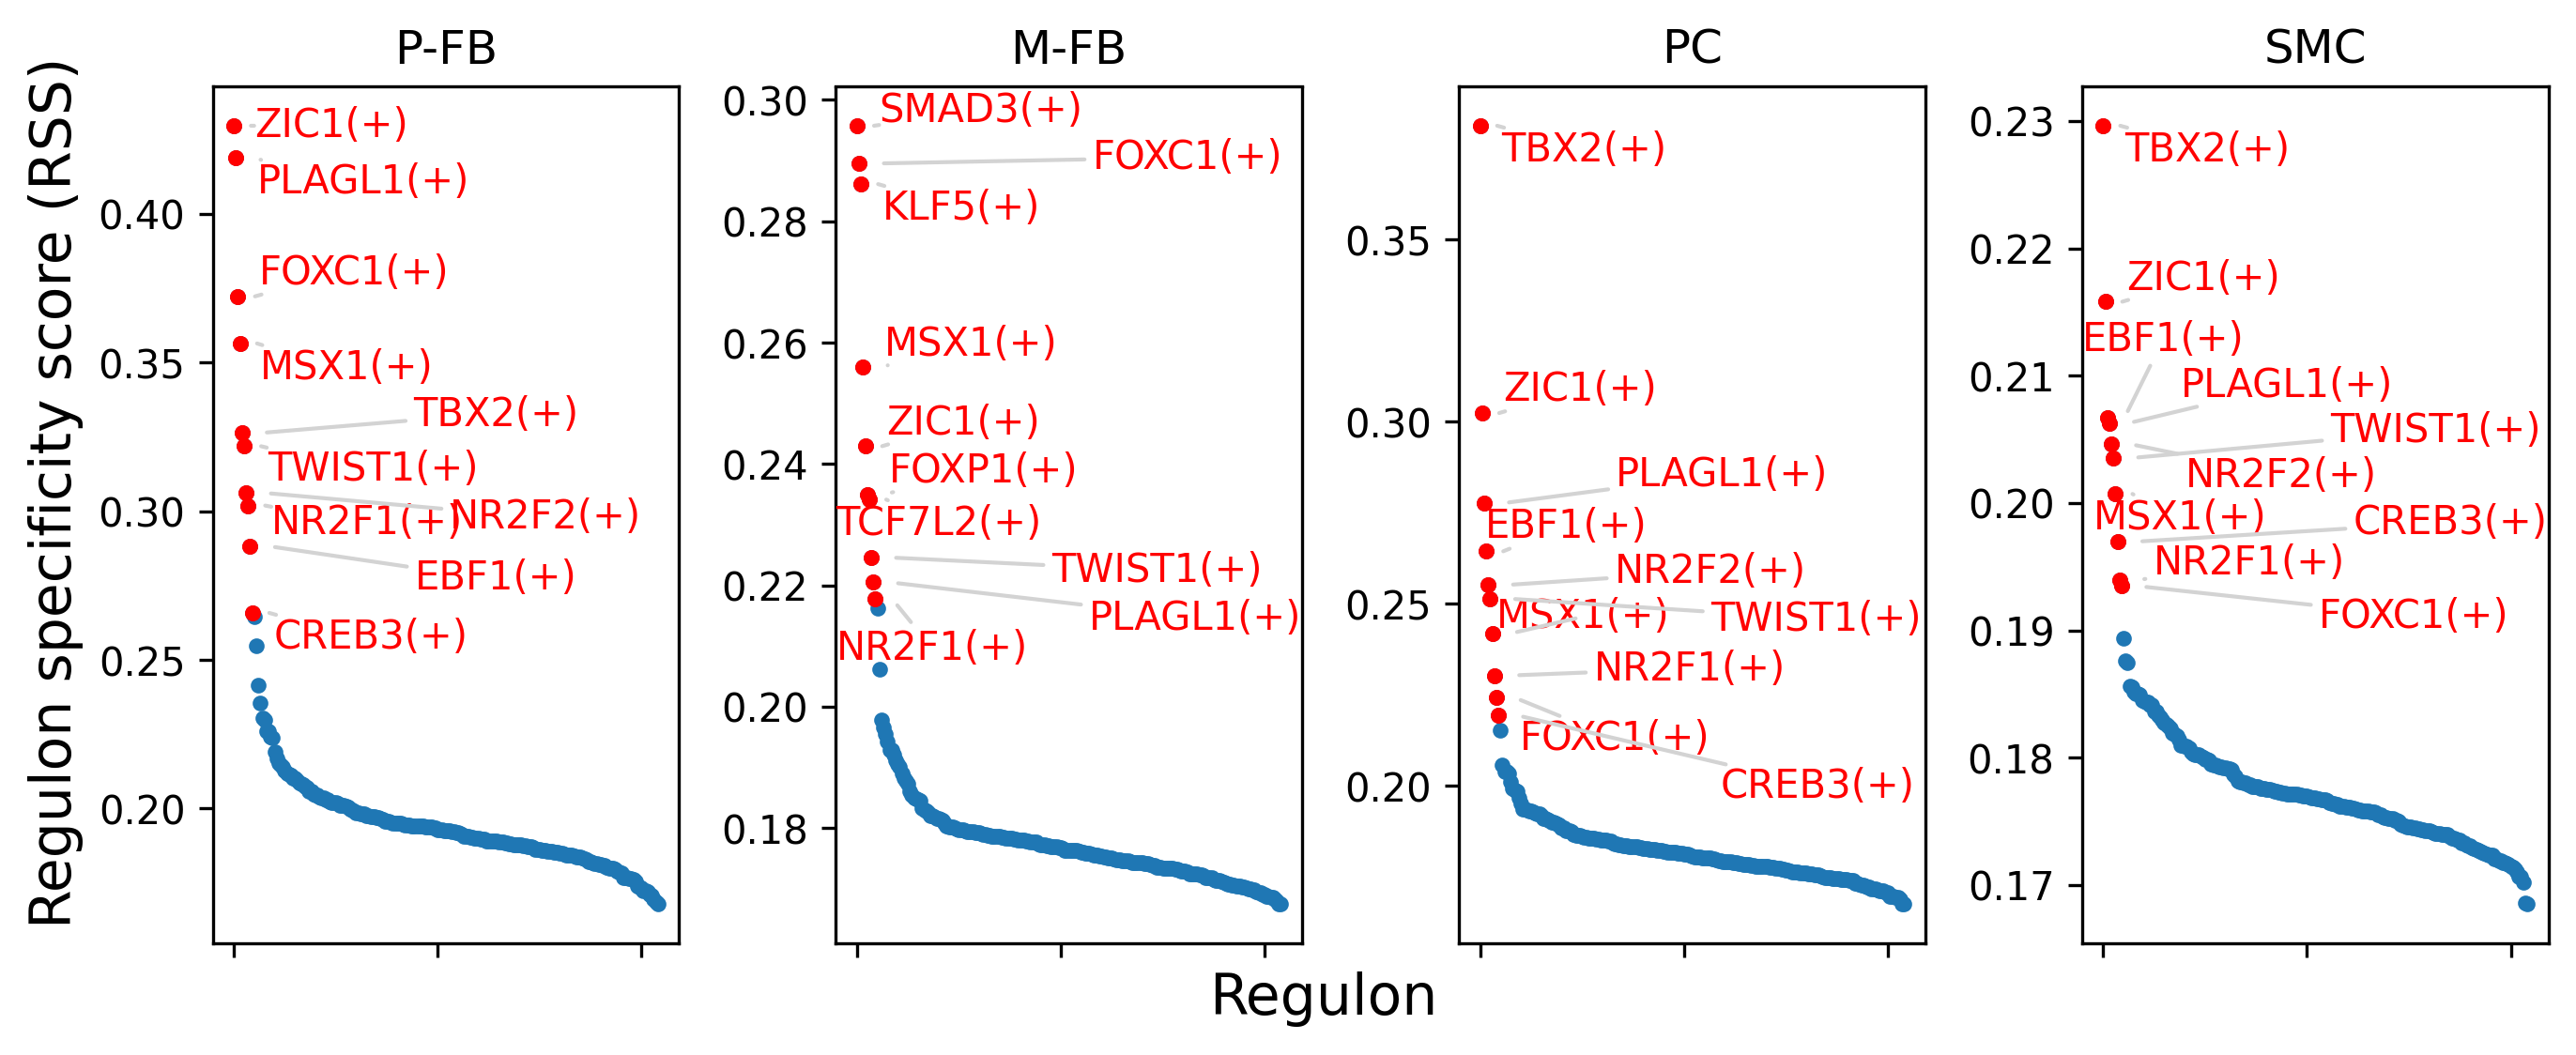

In [50]:
cats = sorted(list(set(annotations)))
cats = ["P-FB", "M-FB", "PC", "SMC"]

fig = plt.figure(figsize=(9, 4*.9))
for c,num in zip(cats, range(1,len(cats)+1)):
    x=cell_type_rss.T[c]
    ax = fig.add_subplot(1,4,num)
    plot_rss(cell_type_rss, c, top_n=10, max_n=None, ax=ax)
    ax.set_ylim( x.min()-(x.max()-x.min())*0.05 , x.max()+(x.max()-x.min())*0.05 )
    for t in ax.texts:
        t.set_fontsize(10)
    ax.set_ylabel('')
    ax.set_xlabel('')
    adjust_text(ax.texts, autoalign='xy', ha='right', va='bottom', arrowprops=dict(arrowstyle='-',color='lightgrey'), precision=0.001 )
 
fig.text(0.5, 0.0, 'Regulon', ha='center', va='center', size='x-large')
fig.text(0.00, 0.5, 'Regulon specificity score (RSS)', ha='center', va='center', rotation='vertical', size='x-large')
plt.tight_layout()
plt.rcParams.update({
    'figure.autolayout': True,
        'figure.titlesize': 'large' ,
        'axes.labelsize': 'medium',
        'axes.titlesize':'large',
        'xtick.labelsize':'medium',
        'ytick.labelsize':'medium'
        })
plt.savefig("cellType-RSS-top5.pdf", dpi=600, bbox_inches = "tight")
plt.show()

### Heatmap

In [52]:
topreg = []
cats = ["P-FB", "M-FB", "PC", "SMC"]
for i,c in enumerate(cats):
    topreg.extend(
        list(cell_type_rss.T[c].sort_values(ascending=False)[:10].index)
    )
topreg = list(set(topreg))

In [53]:
auc_mtx_Z = pd.DataFrame( index=auc_mtx.index )
for col in list(auc_mtx.columns):
    auc_mtx_Z[ col ] = ( auc_mtx[col] - auc_mtx[col].mean()) / auc_mtx[col].std(ddof=0)
#auc_mtx_Z.sort_index(inplace=True)

/var/folders/hy/k103d1ys6_35t6f3bw20ftjw0000gn/T/ipykernel_33698/68287874.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  auc_mtx_Z[ col ] = ( auc_mtx[col] - auc_mtx[col].mean()) / auc_mtx[col].std(ddof=0)
/var/folders/hy/k103d1ys6_35t6f3bw20ftjw0000gn/T/ipykernel_33698/68287874.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  auc_mtx_Z[ col ] = ( auc_mtx[col] - auc_mtx[col].mean()) / auc_mtx[col].std(ddof=0)
/var/folders/hy/k103d1ys6_35t6f3bw20ftjw0000gn/T/ipykernel_33698/68287874.py:3: PerformanceWarning: DataFrame is h

Downsample matrix

In [83]:
#cats = sorted(list(set(annotations)))
cats = ["P-FB", "M-FB", "PC", "SMC"]
cell_id_vec = []

for i in cats:
    annotations_sub = annotations[annotations == i]
    #cell_id_vec.extend(random.choices(annotations_sub.index.values, k = 2000))
    cell_id_vec.extend(annotations_sub.index.values)

In [84]:
len(cell_id_vec)

2874

In [85]:
annotations_sub = annotations[cell_id_vec]

In [86]:
auc_mtx_Z_sub = auc_mtx_Z.loc[cell_id_vec]

In [87]:
def palplot(pal, names, colors=None, size=1):
    n = len(pal)
    f, ax = plt.subplots(1, 1, figsize=(n * size, size))
    ax.imshow(np.arange(n).reshape(1, n),
              cmap=mpl.colors.ListedColormap(list(pal)),
              interpolation="nearest", aspect="auto")
    ax.set_xticks(np.arange(n) - .5)
    ax.set_yticks([-.5, .5])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    colors = n * ['k'] if colors is None else colors
    for idx, (name, color) in enumerate(zip(names, colors)):
        ax.text(0.0+idx, 0.0, name, color=color, horizontalalignment='center', verticalalignment='center')
    return f

In [88]:
cats

['P-FB', 'M-FB', 'PC', 'SMC']

In [89]:
color_vec = ["#F8766D", "#C77CFF", "#7CAE00", "#00BFC4"]

#for n, i in enumerate(cats):
#    if i not in ["FB-like", "Mural cell", "Endothelial"]:
#        colors[n] = "white"
    


colorsd = dict( zip( cats, color_vec ))
colormap = [ colorsd[x] for x in annotations_sub ]

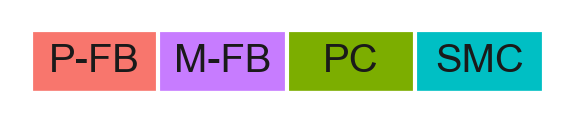

In [95]:
sns.set()
sns.set(font_scale=0.8)
fig = palplot( color_vec, cats, size=.5)
plt.savefig("top_regulons_heatmap-legend.pdf", dpi=600, bbox_inches = "tight")

/Users/plezar/opt/anaconda3/envs/SCENIC/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


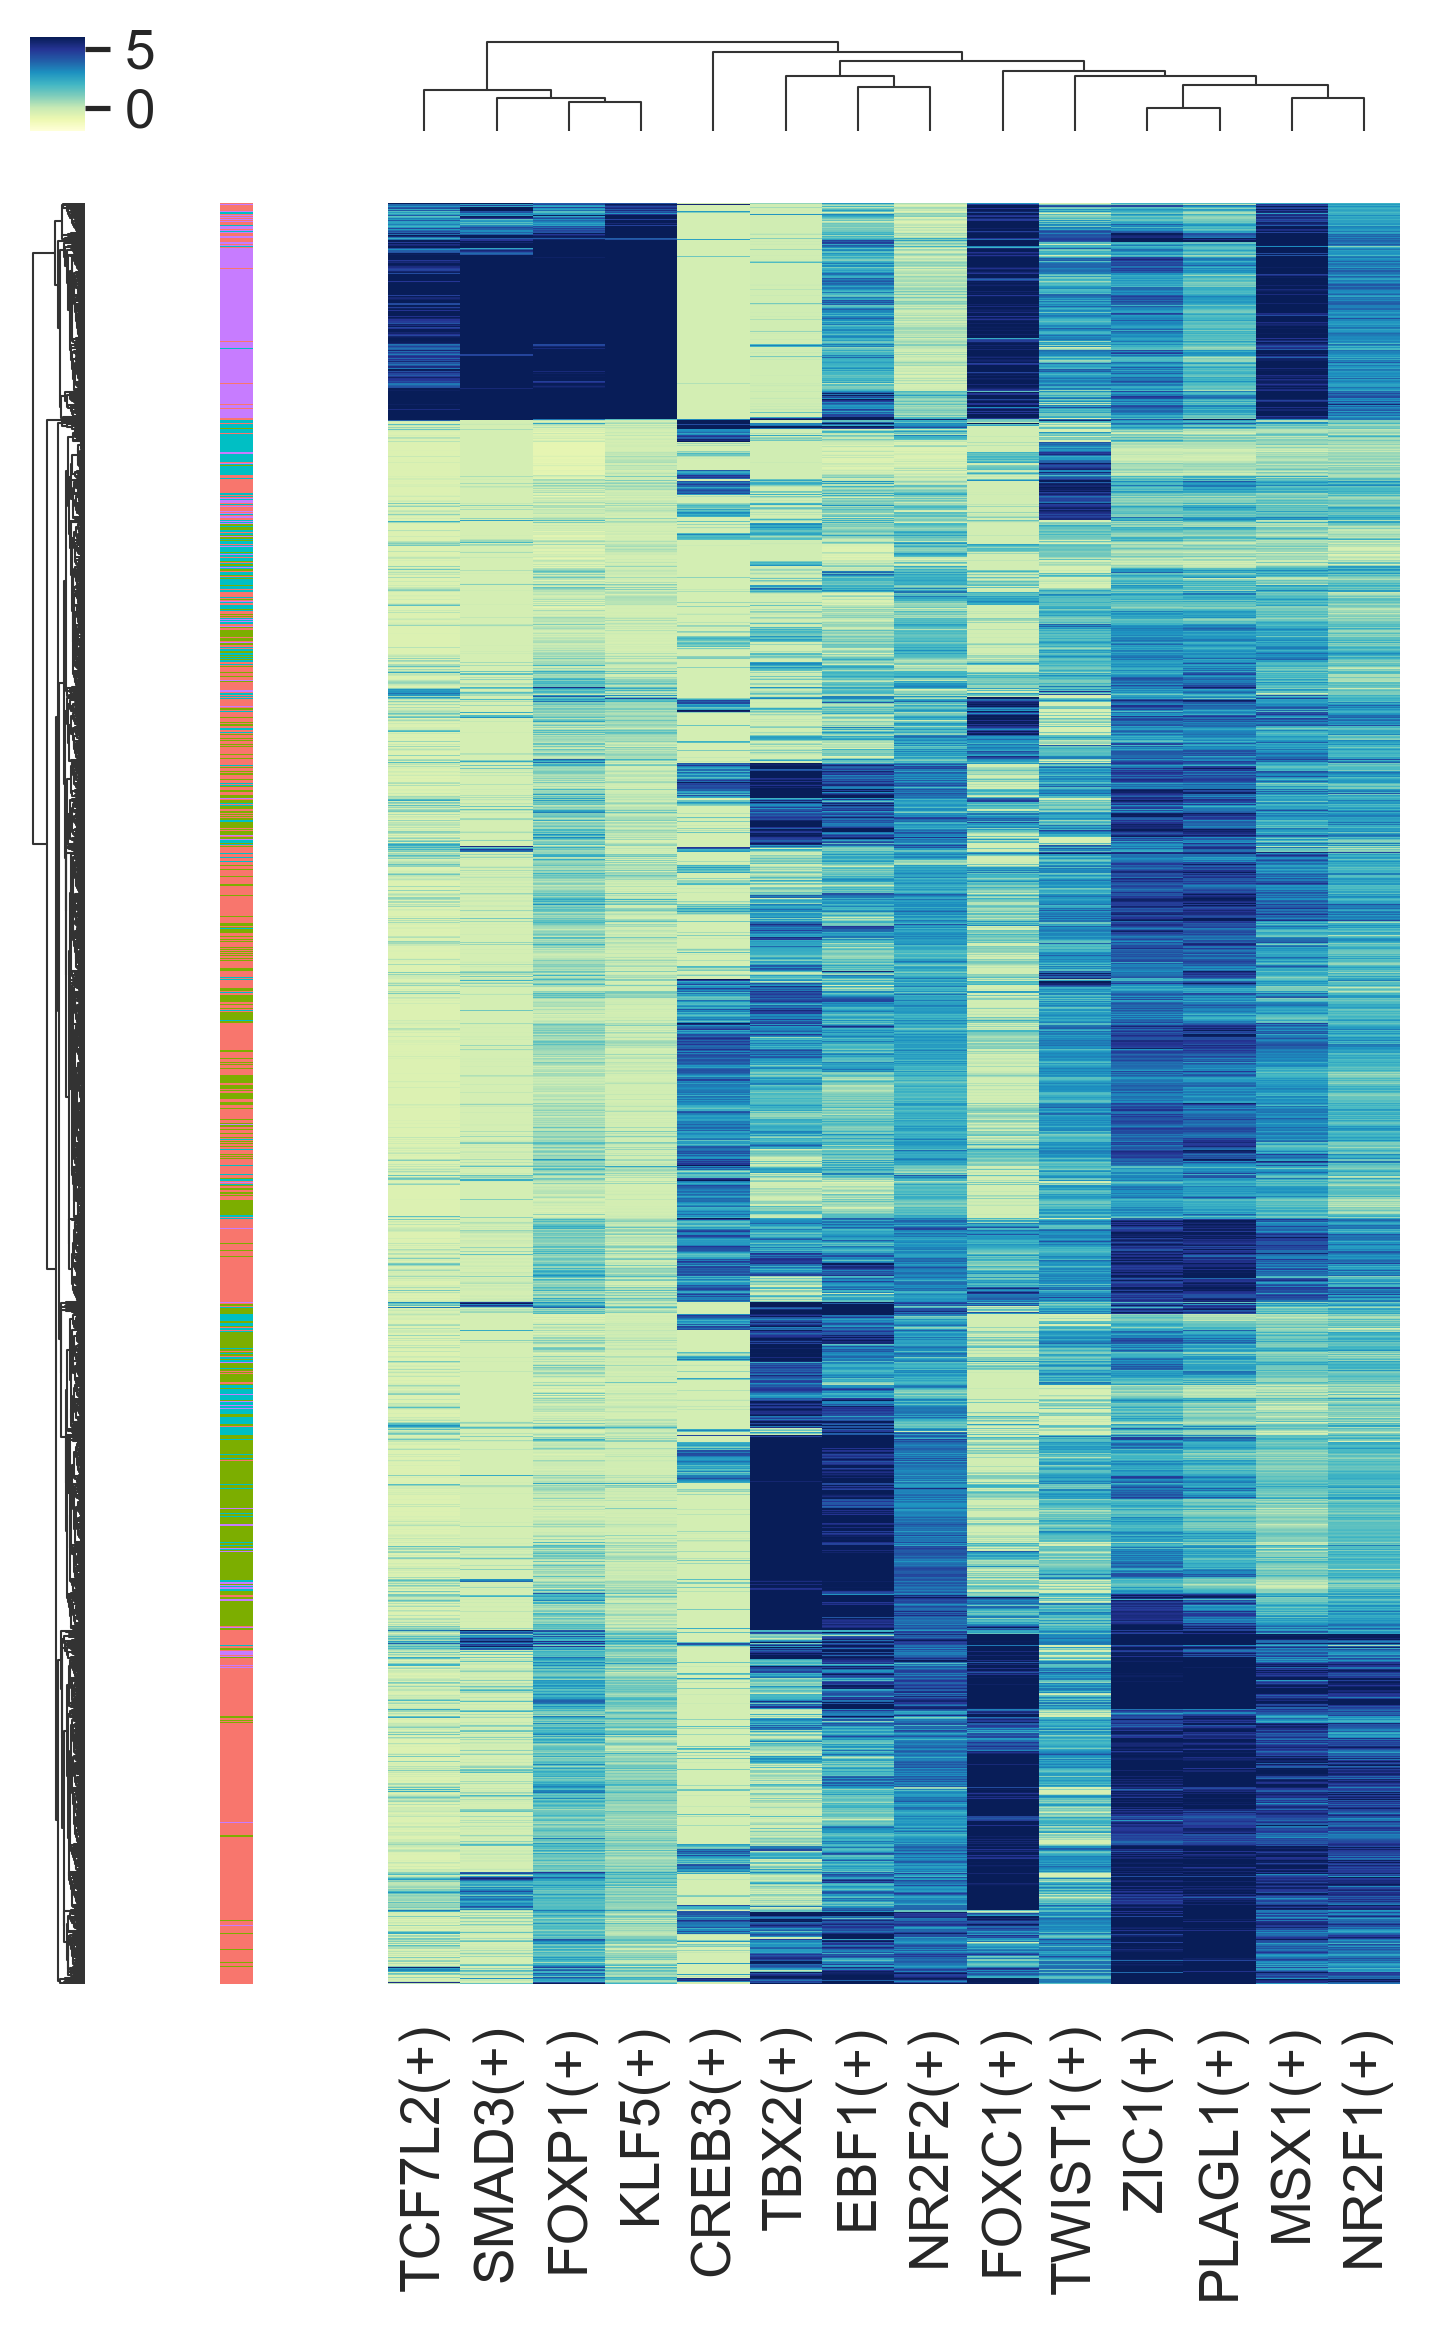

In [97]:
sns.set(font_scale=1.2)
g = sns.clustermap(auc_mtx_Z_sub[topreg], annot=False,  square=False,  linecolor='gray',
    yticklabels=False, xticklabels=True, vmin=-2, vmax=6, row_colors=colormap,
    cmap="YlGnBu", figsize=(5,8), dendrogram_ratio=0.05 )
g.cax.set_visible(True)
g.ax_heatmap.set_ylabel('')
g.ax_heatmap.set_xlabel('')
plt.savefig("top_regulons_heatmap.pdf", dpi=600, bbox_inches = "tight")

### Clustering

In [7]:
adata = scanpy.read_loom(os.path.join(scenic_out_dir, 'seurat_obj_sub_small.loom'))

In [8]:
scanpy.pp.highly_variable_genes(adata)
adata = adata[:, adata.var['highly_variable']]

In [9]:
scanpy.tl.pca(adata, svd_solver='arpack')

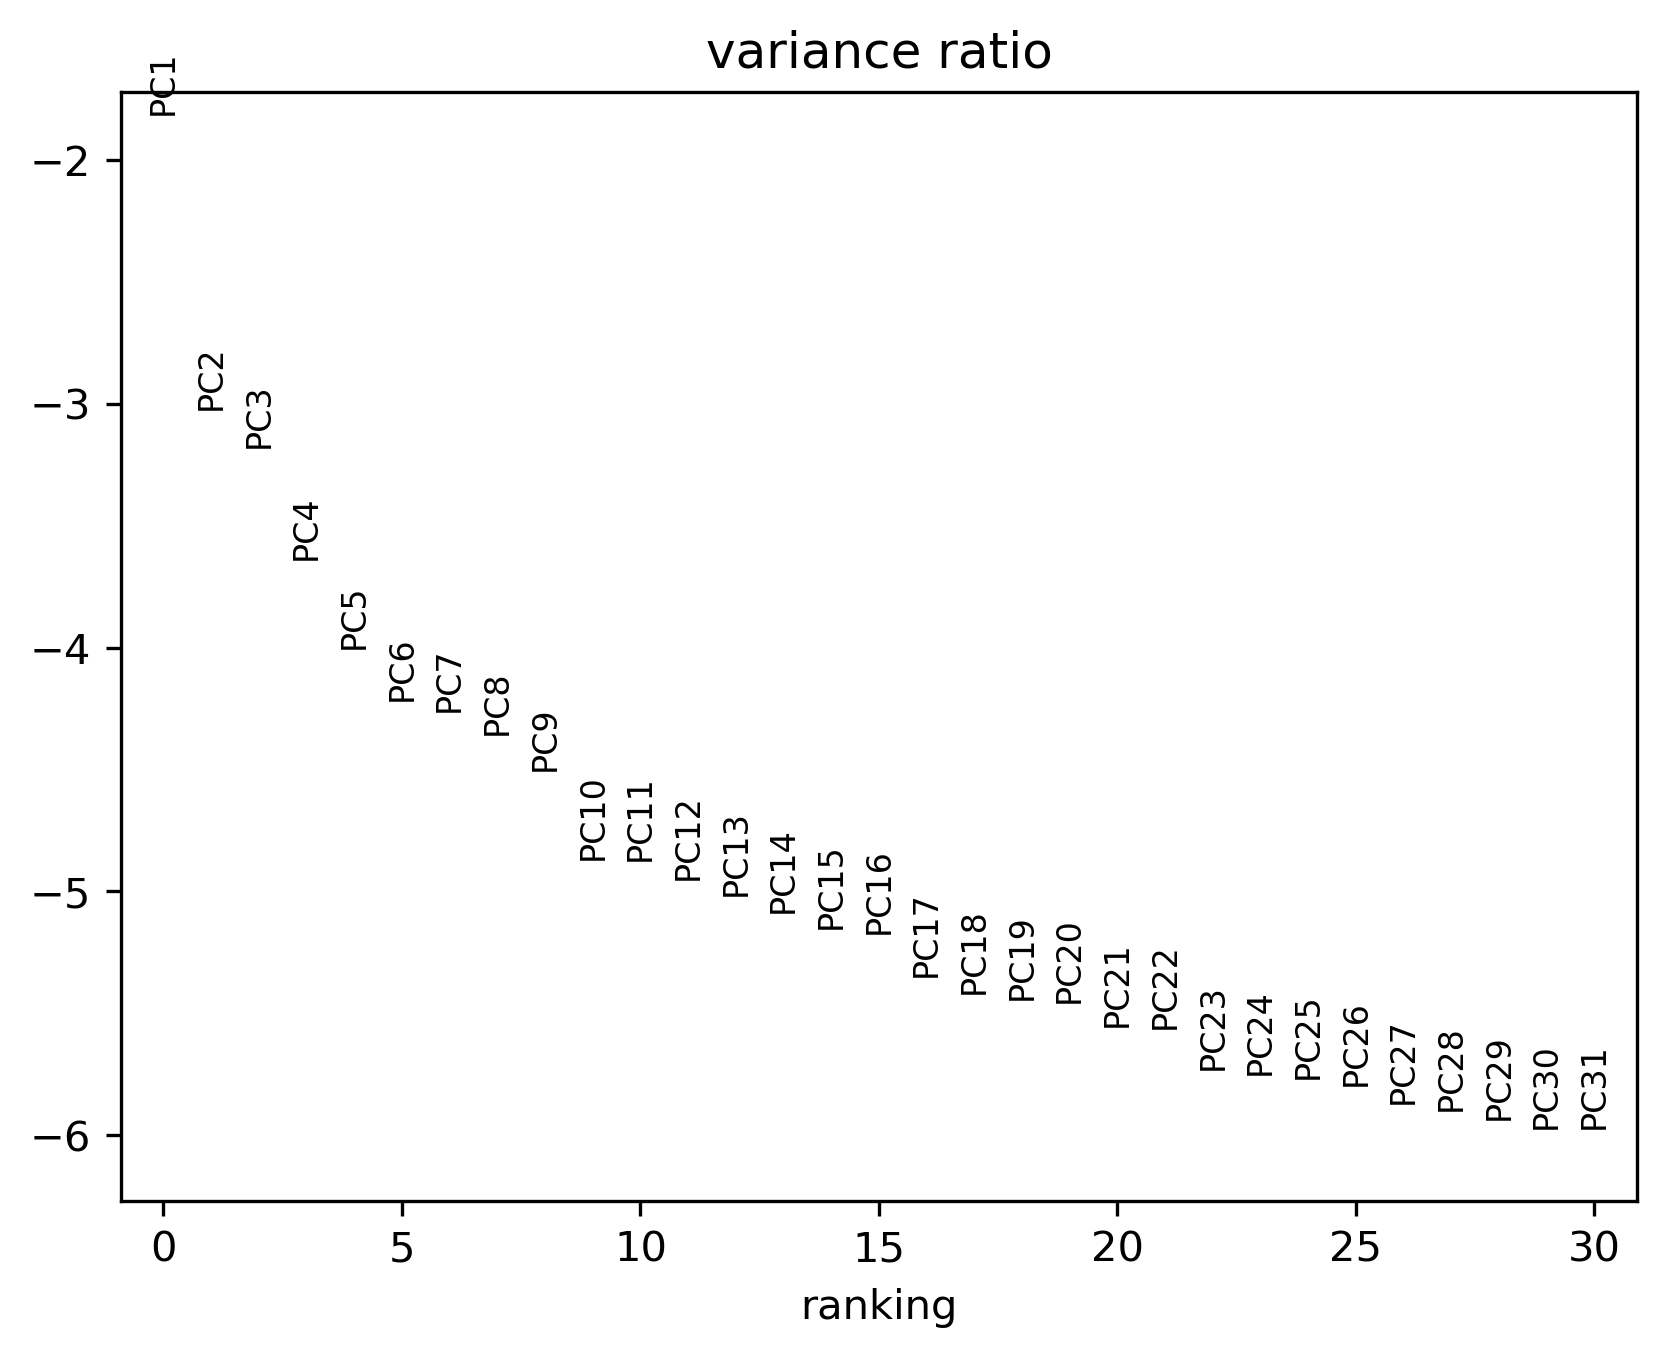

In [10]:
scanpy.pl.pca_variance_ratio(adata, log=True)

In [10]:
scanpy.tl.tsne(adata, n_pcs = 10)

In [ ]:
scanpy.set_figure_params(frameon=False, dpi=150, fontsize=8)
scanpy.pl.tsne(adata, color=['cell.type.fine'])

In [ ]:
scanpy.pl.umap(adata, color=['COL1A1', 'PDGFRA'])

In [22]:
scanpy.tl.umap(adata)

In [ ]:
scanpy.pl.umap(adata)

In [43]:
cell_types = sorted(list(set(annotations)))

top_cell_type_tfs = []
for i,c in enumerate(cell_types):
  top_cell_type_tfs.extend(list(cell_type_rss.T[c].sort_values(ascending=False)[:10].index))

In [45]:
top_cell_type_tfs = list(set(top_cell_type_tfs))
auc_mtx_Z = pd.DataFrame(index=auc_mtx.index)
for col in list(auc_mtx.columns):
  auc_mtx_Z[col] = (auc_mtx[col] - auc_mtx[col].mean()) / auc_mtx[col].std(ddof=0)

/tmp/190058.1.debug/ipykernel_2282394/1433771707.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  auc_mtx_Z[col] = (auc_mtx[col] - auc_mtx[col].mean()) / auc_mtx[col].std(ddof=0)
/tmp/190058.1.debug/ipykernel_2282394/1433771707.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  auc_mtx_Z[col] = (auc_mtx[col] - auc_mtx[col].mean()) / auc_mtx[col].std(ddof=0)
/tmp/190058.1.debug/ipykernel_2282394/1433771707.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many time

In [47]:
def palplot(pal, names, colors=None, size=1):
  n = len(pal)
  f, ax = plt.subplots(1, 1, figsize=(n * size, size))
  ax.imshow(
    np.arange(n).reshape(1, n),
    cmap=mpl.colors.ListedColormap(list(pal)),
    interpolation='nearest', aspect='auto'
  )
  ax.set_xticks(np.arange(n) - .5)
  ax.set_yticks([-.5, .5])
  ax.set_xticklabels([])
  ax.set_yticklabels([])
  colors = n * ['k'] if colors is None else colors
  for idx, (name, color) in enumerate(zip(names, colors)):
    ax.text(0.0+idx, 0.0, name, color=color, horizontalalignment='center', verticalalignment='center')
  return f

In [51]:
colors = sns.color_palette('husl',n_colors=len(cell_types))
colors_dict = dict(zip(cell_types, colors))
colormap = [colors_dict[x] for x in annotations]

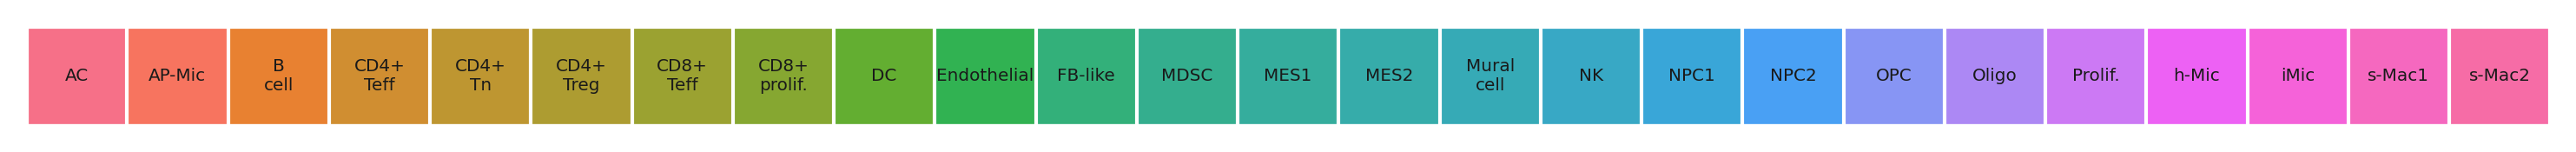

In [52]:
sns.set(font_scale=0.4)
fig = palplot(colors, [ct.replace(' ', '\n') for ct in cell_types], size=0.5)

In [ ]:
sns.set(font_scale=0.8)
regulon_heatmap = sns.clustermap(
  auc_mtx_Z[top_cell_type_tfs],
  annot=False,
  square=False,
  linecolor='gray',
  yticklabels=False,
  xticklabels=True,
  vmin=-2,
  vmax=6,
  row_colors=colormap,
  cmap="YlGnBu", figsize=(12,6)
)
regulon_heatmap.cax.set_visible(True)
regulon_heatmap.ax_heatmap.set_ylabel('')
regulon_heatmap.ax_heatmap.set_xlabel('')

/afs/crc.nd.edu/user/m/mzarodn2/.local/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


Text(0.5, -88.37499999999984, '')